**Task 2**

Gowdafone is a telecommunications company that specialises in consumer and business mobile telephone services. Recently it has experienced a modest sales increase of the services they  offer to their customers. The VP for sales has tapped your expertise to help them predict if a customer will churn or not. ‘Churning’ is the turnover of customers leaving to going to competitive providers. Using the dataset provided, help Gowdafone to predict customer churn by performing the following tasks:

1 - Perform data exploration and visualisation to gain insight about the dataset.

2 - Perform pre-processing if needed.

3 - Split the train_churn dataset for training and testing (validation).

4 - Systematically select features that will be used for your model.

5 - Create a model that will predict if a customer will churn 1-YES, 0-NO

6 - The model must be trained and tested (validated) using the split churn-dataset.

7 - Make churn predictions using the separate test set named  "



First, we will import the data from the CSV file given so we can do some check up with it.

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)
churn = pd.read_csv("/content/gdrive/My Drive/Artificial Intel/Assignments/Task 2/train_churn.csv")

Mounted at /content/gdrive



After imported we can doble check with basic function to see if we are working with the righ data. We also will print some information from it to check if there is any data to be clean or missing. According to the following codes, we have all the data fill. Which means we won't need extra work in cleaning or adding data.

Moreover, printing the data below will help us to give a quick look to understand what kind of data we have and see what we can do with it.


In [175]:
churn.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,NSW,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
1,TAS,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,SA,73,415,No,No,0,224.4,90,38.15,159.5,88,13.56,192.8,74,8.68,13.0,2,3.51,1,0
3,VIC,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,QLD,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


**DATA EXPLORATION**


Below we have some basic informations. The code says the dataset we are working with has 2500 rows and 20 columns. It also gives us the confirmation we do not have any Null content.

In [176]:
churn.info()
print()
print("rows, columns")
churn.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2500 non-null   object 
 1   X2      2500 non-null   int64  
 2   X3      2500 non-null   int64  
 3   X4      2500 non-null   object 
 4   X5      2500 non-null   object 
 5   X6      2500 non-null   int64  
 6   X7      2500 non-null   float64
 7   X8      2500 non-null   int64  
 8   X9      2500 non-null   float64
 9   X10     2500 non-null   float64
 10  X11     2500 non-null   int64  
 11  X12     2500 non-null   float64
 12  X13     2500 non-null   float64
 13  X14     2500 non-null   int64  
 14  X15     2500 non-null   float64
 15  X16     2500 non-null   float64
 16  X17     2500 non-null   int64  
 17  X18     2500 non-null   float64
 18  X19     2500 non-null   int64  
 19  X20     2500 non-null   int64  
dtypes: float64(8), int64(9), object(3)
memory usage: 390.8+ KB

rows, columns


(2500, 20)

Doble check if we have any invalid content in the dataset. According to the results below, we are free of Null content.

In [177]:
print("Null values in the columns, if exist: ")
churn.isnull().sum()

Null values in the columns, if exist: 


X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
dtype: int64

Follow we are getting the correlation in between all the variables. That will not make sense for some variables, but it is good to do it and see it. That simple matrix help a lot to understand the best variables to correlate and come up with better predictions.
In this case, I would belive the data from X19 ("number of times customer service was called") is really important to be part of the analize. That is considering custumers tend to call to customer service due not satisfaction with the service. Which means, more times called, more chance to be changing company providers ("churning", according to information given).

After, We will as well to plot a bar chart to see the correlation in beteween the variables with the "X20".

In [178]:
churn.corr()

,X2,X3,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
X2,1.000000,-0.044713,-0.015681,-0.000706,0.044487,-0.000709,-0.016863,0.018111,-0.016846,-0.006173,-0.007346,-0.006192,0.024856,0.017882,0.024936,0.014611,0.008085
X3,-0.044713,1.000000,0.001913,-0.013289,0.004099,-0.013292,0.001858,-0.020430,0.001877,-0.005234,0.019734,-0.005259,-0.011998,-0.037638,-0.012147,0.019691,0.013126
X6,-0.015681,0.001913,1.000000,0.019737,-0.006548,0.019738,0.008490,-0.004938,0.008504,0.005246,0.007349,0.005233,0.031870,0.019446,0.031958,-0.006626,-0.082557
X7,-0.000706,-0.013289,0.019737,1.000000,0.009237,1.000000,0.006355,0.029700,0.006343,-0.022324,0.030752,-0.022333,-0.012198,0.009236,-0.012156,-0.019999,0.182051
X8,0.044487,0.004099,-0.006548,0.009237,1.000000,0.009231,-0.010186,0.007347,-0.010178,0.005985,-0.011260,0.005977,0.006839,0.001862,0.006994,-0.025276,0.015499
X9,-0.000709,-0.013292,0.019738,1.000000,0.009231,1.000000,0.006368,0.029700,0.006356,-0.022322,0.030755,-0.022331,-0.012198,0.009239,-0.012155,-0.020003,0.182049
X10,-0.016863,0.001858,0.008490,0.006355,-0.010186,0.006368,1.000000,-0.013500,1.000000,-0.009953,0.027558,-0.009936,-0.021584,0.021655,-0.021578,-0.023365,0.085237
X11,0.018111,-0.020430,-0.004938,0.029700,0.007347,0.029700,-0.013500,1.000000,-0.013500,0.003387,0.016782,0.003439,-0.000490,0.001299,-0.000525,0.017467,0.026659
X12,-0.016846,0.001877,0.008504,0.006343,-0.010178,0.006356,1.000000,-0.013500,1.000000,-0.009968,0.027569,-0.009950,-0.021603,0.021661,-0.021597,-0.023376,0.085221
X13,-0.006173,-0.005234,0.005246,-0.022324,0.005985,-0.022322,-0.009953,0.003387,-0.009968,1.000000,-0.006644,0.999999,-0.008503,-0.004482,-0.008433,-0.011615,0.037544




We will also plot a Pie chart to exprees the porcentage of the Churns quantity. That will say if we have a big amount of churn already or not. 

As you can see below, we have a percentage of **13.9%** of churns and a percentage of **89.1%** of no churns. It looks not a big value, but it is important to undersatnd churns can be expensive for the company as it may be difficult to have this customer back. Moreover, the customer that has made a churn will probably have done it if they are unsatissfy with the services and also will spread bad reputation about the company. 

In this sense, it is really important to reduce that number as much as the company can do.


In [179]:
#First we count the data accornding to its duplicates in the dataset
duplicates = churn.pivot_table(index=["X20"], aggfunc="size")
print(duplicates)



X20
0    2153
1     347
dtype: int64


In [180]:
#We can also calculate the percentage following the next:
count_no_churn = len(churn[churn['X20']==0])
count_churn = len(churn[churn['X20']==1])
perc_no_churn = count_no_churn/(count_no_churn+count_churn)
print("percentage of no churn is: ", perc_no_churn*100)
per_churn = count_churn/(count_no_churn+count_churn)
print("percentage of churn is: ", per_churn*100)

percentage of no churn is:  86.11999999999999
percentage of churn is:  13.88


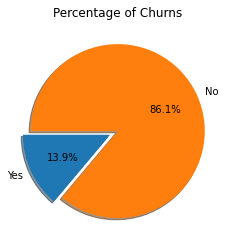

In [181]:
# After we plot the information porcentage of Churn in the dataset according to what we have seem before.
# In this case we have 347 churns and 2153 no churns.

labels = "Yes", "No"
sizes = [347, 2153]
explode = (0.1, 0) # only "explode" the 1st slice (i.e. 'Yes')

#plot
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=180)
plt.title("Percentage of Churns")
plt.show()




Below We have a basic comparition in between the columns X1(states) and X20 (Churns). That will give us an idea what are the relation in between the State and the quantity of churns they have. 

In a first look it looks like Victoria would have a bigger amount of churn, but considering in proportion, all the state are pretty close to each other having from 10% to 15% of churns each.

Below it can be seen the proportion of state and churns are not a big deal, as we can see in the graph and in the data above. The graph show us that the proportion of churns in between the states are pretty similar to each other. So, the state colum might not be interesting to use in the outcome variable.

In [182]:
#Here we are counting the number of churn (specified as number 1) for each state
duplicates = churn.pivot_table(index=["X1", "X20"], aggfunc="size")
print(duplicates)

X1   X20
NSW  0      506
     1       59
NT   0      101
     1       12
QLD  0      219
     1       42
SA   0      190
     1       34
TAS  0      317
     1       53
VIC  0      586
     1      105
WA   0      234
     1       42
dtype: int64


Text(0, 0.5, 'Proportion of churns')

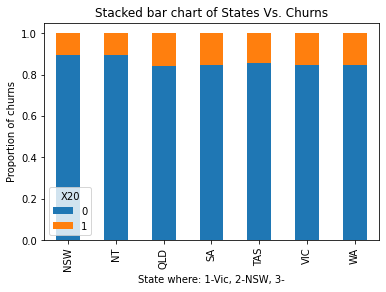

In [183]:
table = pd.crosstab(churn["X1"],churn["X20"])
table.div(table.sum(1).astype(int),axis=0).plot(kind="bar",stacked=True)
plt.title("Stacked bar chart of States Vs. Churns")
plt.xlabel("State where: 1-Vic, 2-NSW, 3-")
plt.ylabel("Proportion of churns")

**Tranforming Data**

I will transform the data in the X4 and X5 colum, which is string, to a numerical value. So I can use it in the future in case I need. "No" it will be converted to 0 and "Yes" will be converted to 1.

Tranforming some string value to integer will help us to have valuable data for our analisys. So we can count on then to test and see if it is worth using it.

**DECIDING DATA TO BE USED**

**X19 - Number of times customer service was called**

The first data which got mine attention was the one in column X19. In this sense, the following code is comparing column X19 (number of times customer service was called) and X20 (churns). That data is really interesting to see how it works and might be a big help with the prediction on the future. 

As we can see, we have a big correlation in between customers who has called the service and if they had churn. Summing all the values of churns (from 1 call to 9 calls) we have a total of 286 churns. It is worth to rememeber we have (in the total of the dataset) 347 churns. Which means that **82,9%** of the customers that churn has called at least one time to the customer service before churning.

This call be a great insight to proove that it is important that the company solve the customer problem in the first contact or even before. Otherwise, the chance of the customer to churn gets higher every call.

So, the frequency of calls is high related to decide if the customer will stay with the company or not. We can see that after the first call, the number of customer that stay get dramactly lower.

In [184]:
#Below we can see the number of calls (0 to 9) for customer service and the total of churns.
duplicates = churn.pivot_table(index=["X19", "X20"], aggfunc="size")
print(duplicates)

X19  X20
0    0      465
     1       61
1    0      805
     1       96
2    0      489
     1       61
3    0      295
     1       28
4    0       73
     1       55
5    0       17
     1       30
6    0        5
     1       10
7    0        3
     1        3
8    0        1
     1        1
9    1        2
dtype: int64


Text(0, 0.5, 'Number of Churn/No Churn')

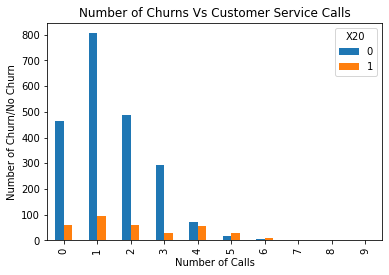

In [185]:

pd.crosstab(churn["X19"], churn["X20"]).plot(kind="bar")
plt.title('Number of Churns Vs Customer Service Calls')
plt.xlabel("Number of Calls")
plt.ylabel("Number of Churn/No Churn")


Below, I have plot a graph to compare the number of calll to customer service comparing to churn or no churn. As the variable Churn is Yes or no and the Number of calls is just until 9 numbers the graph will look funny for the first look. However, as in the graph above, the graph below show how interesting that variable is for the prediction. We can se clearly how the number of churn get bigger in every extra call.

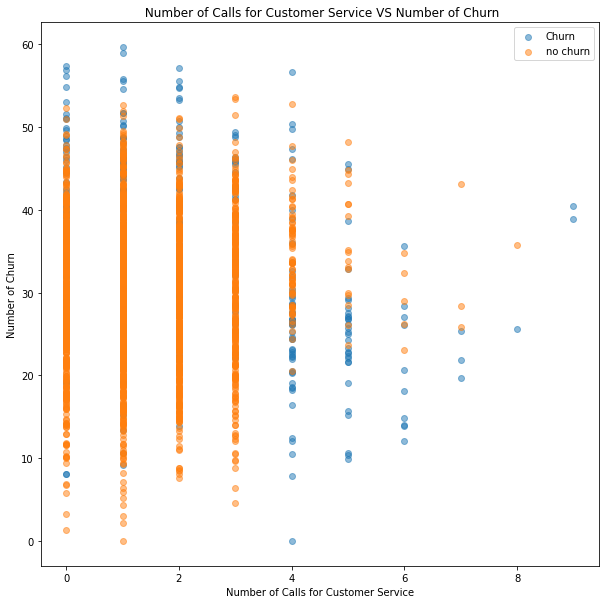

In [208]:
mat_1 = churn[churn["X20"] == 1] # when the data is true
mat_2 = churn[churn["X20"] == 0] # when the data is false

plt.figure(figsize=(10,10))
plt.scatter(mat_1["X19"], mat_1["X9"], alpha=0.5)
plt.scatter(mat_2["X19"], mat_2["X9"], alpha=0.5)
plt.title(" Number of Calls for Customer Service VS Number of Churn")
plt.xlabel("Number of Calls for Customer Service")
plt.ylabel("Number of Churn")
plt.legend(["Churn", "no churn"])
plt.show()

**X4 - Tells whether the subscriber has international calling plan**

**AND**

**X5 - Tells whether subscriber has a voice mail plan**

As following, the international plan looks to be an interisting predictor as well. In commom sense, the international plan could maybe hold some customers in the company, as long as its satisfy the customer. However, the graph below show that in 2255 customer that does not have a international plan, 246 has churn. That is **10%** of churn in this correlation. Moreover, in 245 customer that has international plan, 101 har churn, which is a value of **41%** of churns. In this sense we can believe the international plan is not satysfying the customer or is just not important for 40% of it. Any of the option, it is interesting to add those information on the module created to help in the prediction.

Moreover, that data can be an important point for the company to focus later on and decide what they would do to have a less percentage of churn with their International plan.

After the code, we are going to look to the column X5.

In [186]:
#  No International Plan and International Plan count
duplicates = churn.pivot_table(index=["X4", "X20"], aggfunc="size")
print(duplicates)

X4   X20
No   0      2009
     1       246
Yes  0       144
     1       101
dtype: int64


Text(0, 0.5, 'Number of Churn')

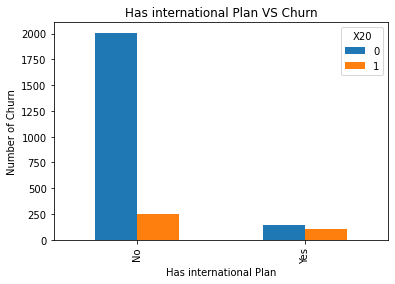

In [187]:
pd.crosstab(churn["X4"],churn["X20"]).plot(kind='bar')
plt.title('Has international Plan VS Churn')
plt.xlabel('Has international Plan')
plt.ylabel('Number of Churn')

**Observation:** To work with this data in the model later on, we need to change the data from X4 from string to Numeric value. Below we do that:

In [0]:
#The Column X4 tells whether the subscriber has international calling plan. Lets transform in 0 for no and 1 for yes
churn["X4"] = churn[["X4"]].replace(["No"], "0")
churn["X4"] = churn[["X4"]].replace(["Yes"], "1")
churn["X4"] = pd.to_numeric(churn["X4"])

For this parameter, we can see that **15,9%** of the customer who does not have a voice mail plan has churned. Otherwise, only **8,7%** of the ones who does have a voice mail plan has churned. It does not look a big difference, but as we are working with churns and is still almost doble the difference show, we will considered as a predictor in our final model.

In [189]:
#  No Voice Plan and Voice Plan count
duplicates = churn.pivot_table(index=["X5", "X20"], aggfunc="size")
print(duplicates)

X5   X20
No   0      1513
     1       286
Yes  0       640
     1        61
dtype: int64


Text(0, 0.5, 'Number of Churn')

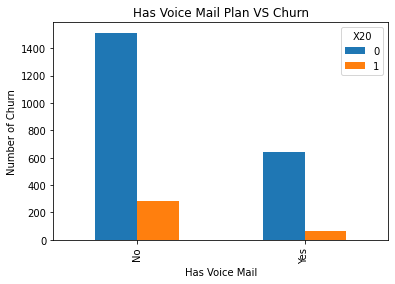

In [190]:
pd.crosstab(churn["X5"],churn["X20"]).plot(kind='bar')
plt.title('Has Voice Mail Plan VS Churn')
plt.xlabel('Has Voice Mail')
plt.ylabel('Number of Churn')

**Observation**:
FOr the same reason we have changed in the data above, we need to change the column X5 from string to a numeric value. Otherwise, the model will not be able to read it through. Below we do the code to swap it.

In [0]:
# The Column X5 tells whether subscriber has a voice mail plan. Lets transform in 0 for no and 1 for yes
churn["X5"] = churn[["X5"]].replace(["No"], "0")
churn["X5"] = churn[["X5"]].replace(["Yes"], "1")
churn["X5"] = pd.to_numeric(churn["X5"])

**X2 - Maintained the account, shown in number of months**

**AND**

**X9 - Total amount charged for day calls**

For those data, we have a big difference of number in the column as it is count as months. We can see below that there is costumer from 1 month to 243 (which means 20 years). That data will be really important for our model.

Moreover, the price charged during work time hours (Day calls) is a really important factor for keeping in the company. That is why we will also consider that data.

Moreover, from the graph ploted we can see that those two variable correlated are even more interesting. Where if the value of the call is low and the customer is a long term customer, it will tend to NOT churn. Hoever, if the value has increased much, the customer ir churn.

As the graph plotted below, we can see that the churn value (blue) are more present when X2 is on the "middle" time and X9 are higher. Which means we can consider as:
- Higher value charged, more chance of churns.
- Avarage time of loyalt (in between 50 to 150 months), more chances for churns.


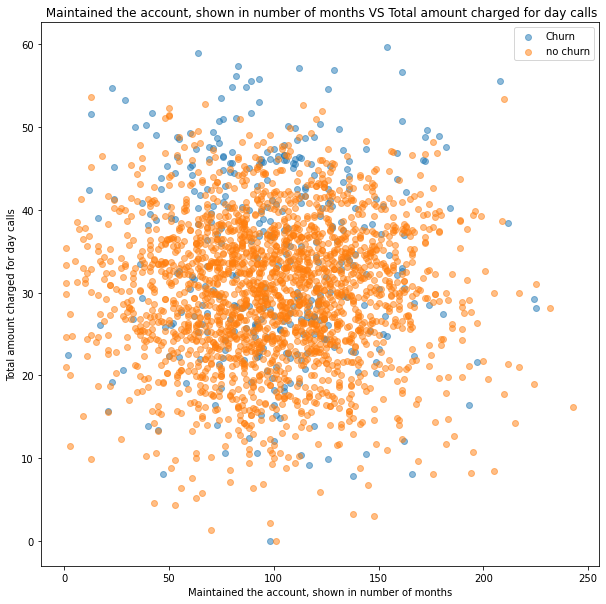

In [192]:
mat_1 = churn[churn["X20"] == 1] # when the data is true
mat_2 = churn[churn["X20"] == 0] # when the data is false

plt.figure(figsize=(10,10))
plt.scatter(mat_1["X2"], mat_1["X9"], alpha=0.5)
plt.scatter(mat_2["X2"], mat_2["X9"], alpha=0.5)
plt.title(" Maintained the account, shown in number of months VS Total amount charged for day calls")
plt.xlabel("Maintained the account, shown in number of months")
plt.ylabel("Total amount charged for day calls")
plt.legend(["Churn", "no churn"])
plt.show()

In [193]:
#  Months
duplicates = churn.pivot_table(index=["X2", "X20"], aggfunc="size")
print(duplicates)

X2   X20
1    0      6
2    1      1
3    0      3
4    0      1
5    0      1
           ..
224  1      1
225  0      1
     1      1
232  0      1
243  0      1
Length: 348, dtype: int64


In [194]:
#  Charge value Day calls
duplicates = churn.pivot_table(index=["X9", "X20"], aggfunc="size")
print(duplicates)

X9     X20
0.00   0      1
       1      1
1.34   0      1
2.13   0      1
2.99   0      1
             ..
56.83  1      1
57.04  1      1
57.36  1      1
58.96  1      1
59.64  1      1
Length: 1607, dtype: int64


**LINEAR REGRESSION**

Below we are going to see with the Linear Regression 3 models and see which one will be better to be used. 

The first model was the best option, as can be seen in the accuracys below. So, I will use the first model for the predictions.

**MODEL 1**

In [195]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

predictors = ["X2",  # maintained the account, shown in number of months
              "X4",  # tells whether the subscriber has international calling plan
              "X5",  # tells whether subscriber has a voice mail plan
              "X9",  # total amount charged for day calls
              "X19"] # number of times customer service was called

features = churn[predictors]
target = churn["X20"]

X_train,X_test, y_train, y_test = train_test_split(churn,churn["X20"], test_size=0.25,
random_state=0)

#model instantiation
churn1 = LogisticRegression(max_iter=10000)

#fitting the model
churn1.fit(X_train[predictors],y_train)


from sklearn import metrics

#make predictions
print(churn1.coef_)
print(churn1.intercept_)
print()

pred1 = churn1.predict(X_test[predictors])
print("Classifier Accuracy is:")
print((pred1 == y_test).sum()/len(y_test))
print()


[[-5.57846797e-04  1.90193637e+00 -8.45497708e-01  5.53347876e-02
   5.14214086e-01]]
[-4.5578133]

Classifier Accuracy is:
0.8784



**CONFUSION MATRIX**



Accuracy: 0.88
Precision: 0.55
Recall: 0.14


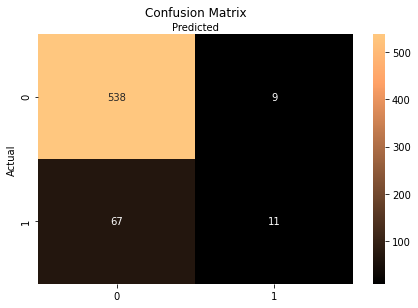

In [196]:
conf_matrix = metrics.confusion_matrix(y_test, pred1)
conf_matrix

#creating heatmaps
#import libraries
import seaborn as sns
%matplotlib inline

#store class names in arrray
cls_name=[1,0]

#creating subplots
fig,ax = plt.subplots()

#set tick marks
t_marks = np.arange(len(cls_name))
plt.xticks(t_marks,cls_name)
plt.yticks(t_marks,cls_name)

#heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="copper", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#evaluaiton metrics
print("Accuracy:",round(metrics.accuracy_score(y_test,pred1),2))
print("Precision:",round(metrics.precision_score(y_test,pred1),2))
print("Recall:",round(metrics.recall_score(y_test,pred1),2))

In [197]:
from sklearn.ensemble import ExtraTreesClassifier
tree_model = ExtraTreesClassifier()
tree_model.fit(features,target)
print(tree_model.feature_importances_)

[0.26990161 0.07098993 0.02553202 0.45258023 0.18099621]


**MODEL2**

In [198]:
predictors2 = ["X6",  # number of voicemail messages
              "X7",  # total minutes called during the day
              "X10",  # total minutes called during the evening
              "X13",  # total minutes called during the night
              "X16"] # total minutes of international calls

features2 = churn[predictors2]
target = churn["X20"]

X_train,X_test, y_train, y_test = train_test_split(churn,churn["X20"], test_size=0.25,
random_state=0)

#model instantiation
churn2 = LogisticRegression(max_iter=10000)

#fitting the model
churn2.fit(X_train[predictors2],y_train)


#make predictions
print(churn2.coef_)
print(churn2.intercept_)
print()

pred2 = churn2.predict(X_test[predictors2])
print("Classifier Accuracy is:")
print((pred2 == y_test).sum()/len(y_test))
print()

[[-0.02402345  0.0092434   0.00556125  0.00182901  0.07691734]]
[-5.66036906]

Classifier Accuracy is:
0.8768



Accuracy: 0.88
Precision: 1.0
Recall: 0.01


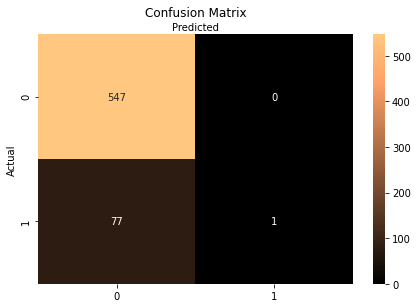

In [199]:
conf_matrix2 = metrics.confusion_matrix(y_test, pred2)
conf_matrix2

#creating heatmap
#store class names in arrray
cls_name=[1,0]

#creating subplots
fig,ax = plt.subplots()
#heatmap
sns.heatmap(pd.DataFrame(conf_matrix2), annot=True, cmap="copper", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#evaluaiton metrics
print("Accuracy:",round(metrics.accuracy_score(y_test,pred2),2))
print("Precision:",round(metrics.precision_score(y_test,pred2),2))
print("Recall:",round(metrics.recall_score(y_test,pred2),2))

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
tree_model = ExtraTreesClassifier()
tree_model.fit(features2,target)
print(tree_model.feature_importances_)

[0.06900215 0.34398334 0.21987036 0.1870119  0.18013225]


**MODEL 3**

In [200]:
predictors3 = ["X2",  # maintained the account, shown in number of months
              "X9",  # total amount charged for day calls
              "X19",  # number of times customer service was called
              "X7",  # total minutes called during the day
              "X10"] # total minutes called during the evening

features3 = churn[predictors3]
target = churn["X20"]

X_train,X_test, y_train, y_test = train_test_split(churn,churn["X20"], test_size=0.25,
random_state=0)

#model instantiation
churn3 = LogisticRegression(max_iter=10000)

#fitting the model
churn3.fit(X_train[predictors2],y_train)


#make predictions
print(churn3.coef_)
print(churn3.intercept_)
print()

pred3 = churn3.predict(X_test[predictors3])
print("Classifier Accuracy is:")
print((pred3 == y_test).sum()/len(y_test))
print()

[[-0.02402345  0.0092434   0.00556125  0.00182901  0.07691734]]
[-5.66036906]

Classifier Accuracy is:
0.1456



**Observation:**

The accuracy for that model is so low that I will not do the confusion matrix. It is already well known as not a good model for that prediction.

**Applying**

Time to apply the model where we want to.

In [201]:
#First we get the data given fo the real prediction
drive.mount("/content/gdrive", force_remount=True)
churn_predicted = pd.read_csv("/content/gdrive/My Drive/Artificial Intel/Assignments/Task 2/predict_churn.csv")

churn_predicted.head()


Mounted at /content/gdrive


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,QLD,121,415,No,Yes,41,215.5,95,36.64,241.8,92,20.55,147.0,108,6.61,9.6,3,2.59,1
1,NSW,101,415,No,No,0,124.8,66,21.22,257.2,85,21.86,193.2,115,8.69,13.4,4,3.62,0
2,VIC,115,408,No,No,0,178.7,114,30.38,271.0,96,23.04,245.9,94,11.07,16.4,5,4.43,2
3,NSW,168,415,No,No,0,183.2,131,31.14,179.2,73,15.23,292.8,100,13.18,9.9,5,2.67,2
4,NSW,90,415,No,No,0,167.5,96,28.48,139.1,104,11.82,138.4,87,6.23,13.0,1,3.51,1


In [202]:
#After, we need to tranform the colum X4 in numeric for this data as well, otherwise it will not work.
# The Column X4 tells whether the subscriber has international calling plan. Lets transform in 0 for no and 1 for yes
churn_predicted["X4"] = churn_predicted[["X4"]].replace(["No"], "0")
churn_predicted["X4"] = churn_predicted[["X4"]].replace(["Yes"], "1")
churn_predicted["X4"] = pd.to_numeric(churn["X4"])

#We need to convert the Column X5 as well.
# The Column X5 tells whether subscriber has a voice mail plan
churn_predicted["X5"] = churn_predicted[["X5"]].replace(["No"], "0")
churn_predicted["X5"] = churn_predicted[["X5"]].replace(["Yes"], "1")
churn_predicted["X5"] = pd.to_numeric(churn["X5"])

#And here we check if it worked:
churn_predicted.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,QLD,121,415,0,0,41,215.5,95,36.64,241.8,92,20.55,147.0,108,6.61,9.6,3,2.59,1
1,NSW,101,415,0,0,0,124.8,66,21.22,257.2,85,21.86,193.2,115,8.69,13.4,4,3.62,0
2,VIC,115,408,0,0,0,178.7,114,30.38,271.0,96,23.04,245.9,94,11.07,16.4,5,4.43,2
3,NSW,168,415,1,0,0,183.2,131,31.14,179.2,73,15.23,292.8,100,13.18,9.9,5,2.67,2
4,NSW,90,415,1,0,0,167.5,96,28.48,139.1,104,11.82,138.4,87,6.23,13.0,1,3.51,1


In [203]:
pred_final = ["X2",
              "X4",
              "X5",
              "X9",
              "X19"]

featuresFinal = churn[pred_final]
target = churn["X20"]

#X = churn_predicted[predictors_final]
#print(X)

finalPrediction = churn1.predict(churn_predicted[pred_final])

churn_predicted.head()



,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,QLD,121,415,0,0,41,215.5,95,36.64,241.8,92,20.55,147.0,108,6.61,9.6,3,2.59,1
1,NSW,101,415,0,0,0,124.8,66,21.22,257.2,85,21.86,193.2,115,8.69,13.4,4,3.62,0
2,VIC,115,408,0,0,0,178.7,114,30.38,271.0,96,23.04,245.9,94,11.07,16.4,5,4.43,2
3,NSW,168,415,1,0,0,183.2,131,31.14,179.2,73,15.23,292.8,100,13.18,9.9,5,2.67,2
4,NSW,90,415,1,0,0,167.5,96,28.48,139.1,104,11.82,138.4,87,6.23,13.0,1,3.51,1


In [207]:
#adding the Column X20 with the prediction made
churn_predicted["X20"] = finalPrediction

churn_predicted.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,QLD,121,415,0,0,41,215.5,95,36.64,241.8,92,20.55,147.0,108,6.61,9.6,3,2.59,1,0
1,NSW,101,415,0,0,0,124.8,66,21.22,257.2,85,21.86,193.2,115,8.69,13.4,4,3.62,0,0
2,VIC,115,408,0,0,0,178.7,114,30.38,271.0,96,23.04,245.9,94,11.07,16.4,5,4.43,2,0
3,NSW,168,415,1,0,0,183.2,131,31.14,179.2,73,15.23,292.8,100,13.18,9.9,5,2.67,2,1
4,NSW,90,415,1,0,0,167.5,96,28.48,139.1,104,11.82,138.4,87,6.23,13.0,1,3.51,1,0
5,VIC,70,510,1,0,0,147.1,105,25.01,200.0,135,17.00,234.9,65,10.57,12.5,9,3.38,3,1
6,VIC,138,415,1,0,0,230.1,107,39.12,212.0,120,18.02,174.9,119,7.87,13.2,4,3.56,1,0
7,VIC,43,408,0,1,0,135.8,125,23.09,163.2,88,13.87,229.8,106,10.34,12.6,3,3.40,0,0
8,QLD,117,510,1,1,20,205.7,98,34.97,136.1,107,11.57,159.4,147,7.17,8.7,3,2.35,2,0
9,VIC,108,408,0,1,0,73.8,105,12.55,143.4,114,12.19,170.2,98,7.66,10.9,3,2.94,2,0


**Transfroming to CSV**

Finally we will get the prediction added to the data and transform the document in a CSV document.

In [0]:
churn_predicted.to_csv("/content/gdrive/My Drive/Artificial Intel/Assignments/Task 2/6930_predict.csv")

In [0]:
#calculating the percentage of churn in the predicted database:
count_no_churn = len(churn_predicted[churn['X20']==0])
count_churn = len(churn_predicted[churn_predicted['X20']==1])
perc_no_churn = count_no_churn/(count_no_churn+count_churn)
print("percentage of no churn is: ", perc_no_churn*100)
per_churn = count_churn/(count_no_churn+count_churn)
print("percentage of churn is: ", per_churn*100)

percentage of no churn is:  95.39473684210526
percentage of churn is:  4.605263157894736


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
